Installing Libraries


In [1]:
pip install pandas numpy matplotlib seaborn

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset (UberDataset.csv)

In [7]:
# Load the dataset from the CSV file into a pandas DataFrame
dataset = pd.read_csv("UberDataset.csv")


Printing the first 5 rows

In [8]:
# Print the first 5 rows to see what the data looks like
print("First 5 rows of the dataset:")
print(dataset.head())

First 5 rows of the dataset:
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


Get a summary of the dataset (columns, data types, null values)


In [9]:
# Get a summary of the dataset (columns, data types, null values)
print("\nDataset Information:")
dataset.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**Data Cleaning and Preprocessing**
This step is about fixing problems in the data, like missing values and incorrect data types, so we can analyze it properly.

**What to do:**

Fill in the missing PURPOSE values.

Convert the date columns from plain text to a special datetime format.

Drop any remaining rows with missing information and remove any exact duplicate trips.

1.   Fill in the missing PURPOSE values.
2.   Convert the date columns from plain text to a special datetime format.


1.   Drop any remaining rows with missing information and remove any exact duplicate trips.








In [10]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

/tmp/ipython-input-3227455908.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


In [11]:
# Convert START_DATE and END_DATE from text to a datetime format Python can understand
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

In [12]:
# Drop any rows that still have missing values after our cleaning
dataset.dropna(inplace=True)

# Remove any rows that are exact duplicates of other rows
dataset.drop_duplicates(inplace=True)

In [13]:
# Check the info again to see our changes
print("Dataset Information after cleaning:")
dataset.info()

Dataset Information after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  420 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    420 non-null    object        
 3   START       420 non-null    object        
 4   STOP        420 non-null    object        
 5   MILES       420 non-null    float64       
 6   PURPOSE     420 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 26.2+ KB


**Feature Engineering**
Feature engineering is the creative process of creating new, more informative columns (features) from the existing data. This helps us uncover deeper insights.

We'll start by extracting useful time-based information from the **START_DATE:**

**HOUR:** The hour the trip started (0-23).

**DAY_NIGHT:** A category like 'Morning' or 'Afternoon' based on the hour.

**DAY:** The day of the week (e.g., 'Mon', 'Tues').

**MONTH**: The month of the year (e.g., 'Jan', 'Feb').



**Next, we add two new, powerful features:**

**TRIP_DURATION_MIN:** We calculate the duration of each trip in minutes.

**AVG_SPEED_MPH:** Using the duration and miles, we calculate the average speed of each trip.

**ROUTE:** We create a standardized route name by combining the start and stop locations, which helps us find the most common trips.

**1. Hour of the Day**
First, we extract the hour from the START_DATE. This gives us a numerical value from 0 to 23 for each trip, which is essential for analyzing patterns based on the time of day.

In [23]:
# Extract the hour (0-23) from the START_DATE column
dataset['HOUR'] = dataset['START_DATE'].dt.hour

**2. Time of Day Category**
While the specific hour is useful, it's often easier to analyze trips by broader time blocks. We use the pd.cut function to group the HOUR feature into four distinct categories: Morning, Afternoon, Evening, and Night.

In [24]:
# Create categories for the time of day based on the hour
dataset['DAY_NIGHT'] = pd.cut(x=dataset['HOUR'],
                              bins=[0, 10, 15, 19, 24],
                              labels=['Morning', 'Afternoon', 'Evening', 'Night'])

**3. Day of the Week**
To understand weekly patterns, we extract the day of the week. This initially gives us a number (0 for Monday, 6 for Sunday). We then map these numbers to their corresponding names to make our data and plots more readable.

In [25]:
# Extract the day of the week (0=Mon, 6=Sun)
dataset['DAY_OF_WEEK'] = dataset['START_DATE'].dt.dayofweek

# Map the numbers to day names
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
dataset['DAY'] = dataset['DAY_OF_WEEK'].map(day_label)

**4. Month**
Similarly, to analyze seasonal or monthly trends, we extract the month number from the START_DATE and map it to the month's name (e.g., 1 becomes 'Jan').

In [26]:
# Extract the month number (1-12)
dataset['MONTH'] = dataset['START_DATE'].dt.month

# Map the numbers to month names
month_label = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dataset['MONTH'] = dataset['MONTH'].map(month_label)

**5. Trip Duration**
This feature calculates the total duration of each trip in minutes. We do this by subtracting the START_DATE from the END_DATE, which gives us a time difference that we then convert into minutes. This is a crucial metric for understanding travel time.

In [27]:
# Calculate trip duration by subtracting start from end time and converting to minutes
dataset['TRIP_DURATION_MIN'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 60

**6. Average Speed**
Using the distance (MILES) and our newly created trip duration, we can calculate the average speed in miles per hour (MPH). This feature can act as a proxy for traffic conditions at different times and locations.

In [28]:
# Calculate average speed in MPH.
# Added 1e-6 to the denominator to prevent errors from dividing by zero for very short trips.
dataset['AVG_SPEED_MPH'] = dataset['MILES'] / (dataset['TRIP_DURATION_MIN'] / 60 + 1e-6)

**7. Route**
To find the most common journeys, we create a standardized route feature. By combining the START and STOP locations (and sorting them alphabetically), we ensure that a trip from "Cary" to "Morrisville" is treated the same as a trip from "Morrisville" to "Cary".

In [29]:
# Create a standardized route name by sorting and joining the start and stop locations
dataset['ROUTE'] = dataset.apply(lambda row: "-".join(sorted([row['START'], row['STOP']])), axis=1)

**Data Visualization:**
After preparing our data and creating new features, the next step is data visualization. By creating charts and plots, we can easily see patterns, trends, and insights that would be difficult to spot in a table of numbers. Each plot below is designed to answer a specific question about the Uber rides.

### 1. Trip Counts by Category and Purpose
This first visual gives us a high-level summary. The bar chart on the left shows the overall split between Business and Personal trips. The chart on the right breaks down the trips by their specific Purpose, immediately showing us the most common reasons for travel, such as meetings or meals.

**Key Insight:** The vast majority of Uber rides in this dataset are for Business purposes, not Personal. Among all trips, the most common reasons are for Meetings and Meal/Entertain.

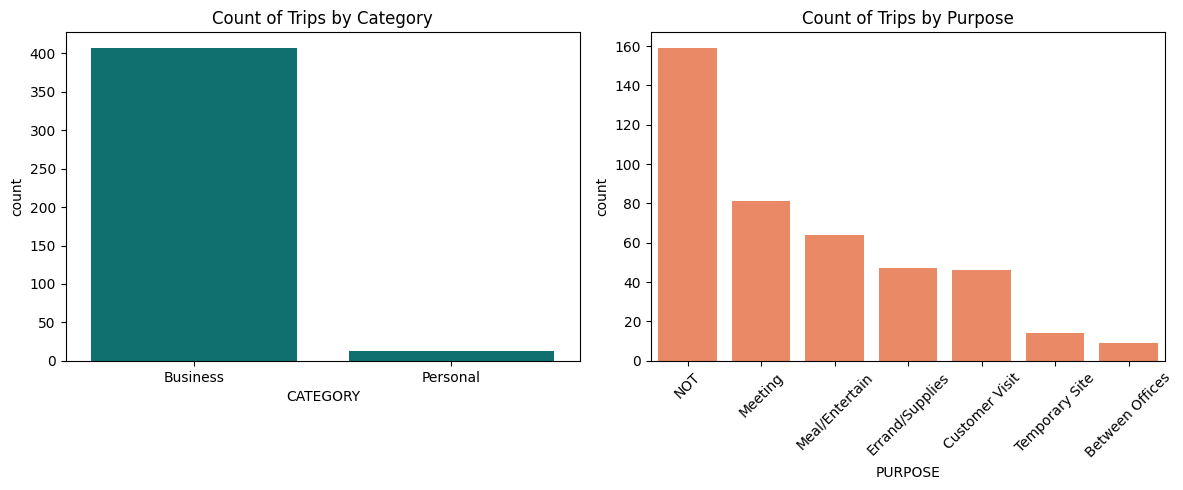

In [36]:
# Create a figure to hold two subplots side-by-side
plt.figure(figsize=(12, 5))

# Subplot 1: Count of trips by Category
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='CATEGORY', color='teal')
plt.title('Count of Trips by Category')

# Subplot 2: Count of trips by Purpose
plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='PURPOSE',
              order=dataset['PURPOSE'].value_counts().index,
              color='coral')
plt.title('Count of Trips by Purpose')
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 2. Trips by Time of Day
This plot helps us understand when trips are most frequent. Using the DAY_NIGHT category we engineered, this chart visualizes the total number of trips taken during the Morning, Afternoon, Evening, and Night, clearly highlighting the peak travel periods.

**Key Insight:** The Afternoon (10 AM to 3 PM) is the busiest period for Uber rides, followed by the Morning. This suggests that most trips are related to mid-day business activities rather than early morning commutes or late-night travel.

/tmp/ipython-input-4259005694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='DAY_NIGHT',


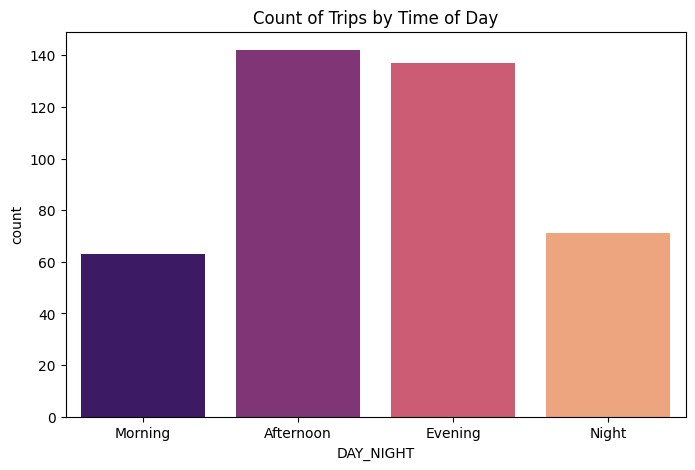

In [37]:
# Create a count plot for the 'DAY_NIGHT' feature
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='DAY_NIGHT',
              order=['Morning', 'Afternoon', 'Evening', 'Night'],
              palette='magma')
plt.title('Count of Trips by Time of Day')
plt.show()

### 3. Trip Purpose by Category
This chart dives deeper by comparing two variables. It shows the different purposes of trips, but separates the bars based on whether they were for Business or Personal use. This helps us answer questions like, "What are the main reasons for business travel compared to personal travel?"

**Key Insight:** Business travel is highly focused; nearly all business trips are for Meetings or Meal/Entertain. Personal travel is more varied, with "Errands" and "Meals" being common, but many trips have no specified purpose.

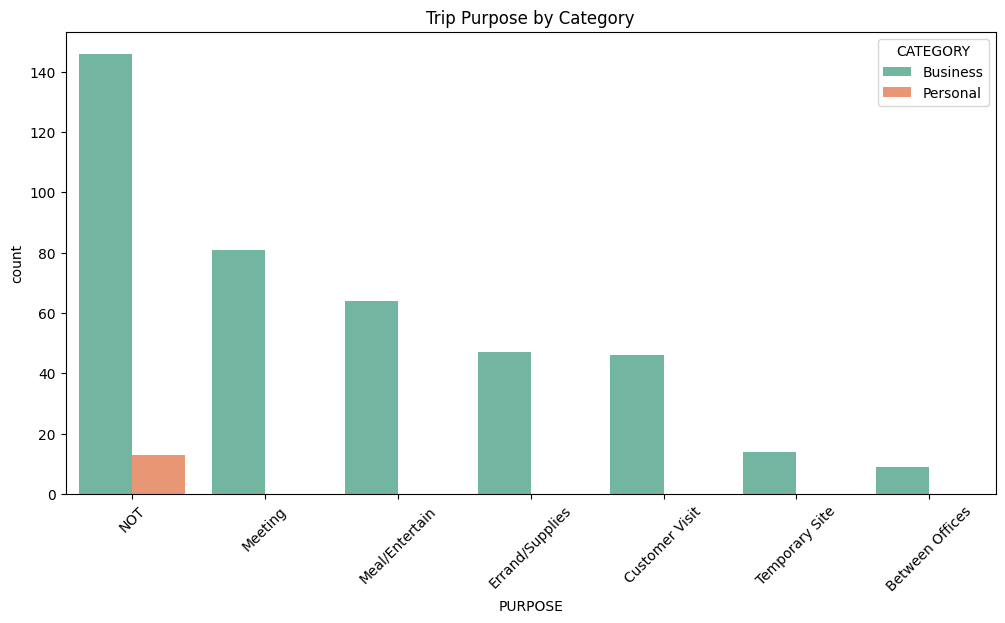

In [38]:
# Create a count plot with 'PURPOSE' on the x-axis and 'CATEGORY' as the hue
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY',
              order=dataset['PURPOSE'].value_counts().index,
              palette='Set2')
plt.title('Trip Purpose by Category')
plt.xticks(rotation=45)
plt.show()

### 4. Trips per Day of the Week
This bar plot shows the total trip volume for each day of the week. It's a simple but effective way to visualize weekly patterns and see if there's a significant difference in travel between weekdays and weekends.

**Key Insight:** Friday is the busiest day for Uber travel. Travel is consistently high during the weekdays and drops off significantly on the weekend, further confirming the data's strong business focus.

/tmp/ipython-input-513114675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values,


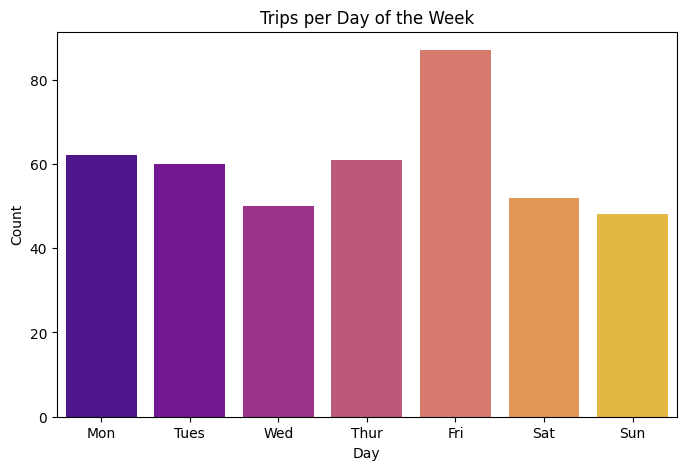

In [39]:
# Get the counts for each day
day_counts = dataset['DAY'].value_counts()

# Create a bar plot to show trips per day
plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values,
            order=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],
            palette='plasma')
plt.title('Trips per Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

### 5. Distribution of Trip Distance
How long are most trips? This visualization uses a boxplot and a histogram to show the distribution of the MILES feature. These plots make it very clear that the vast majority of trips are short-distance, with long trips being relatively rare.

**Key Insight:** Most Uber trips are short-distance. The data is heavily concentrated on trips less than 10 miles, with a peak around 3-5 miles. Long-distance journeys are very uncommon.

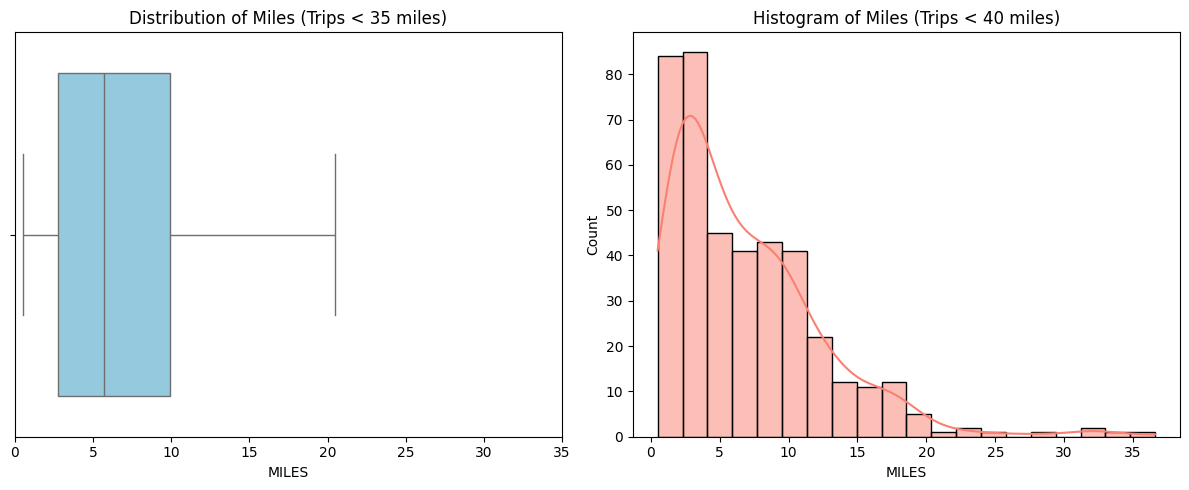

In [43]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Boxplot to show the spread of miles
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, x='MILES', showfliers=False, color='skyblue')
plt.title('Distribution of Miles (Trips < 35 miles)')
plt.xlim(0, 35)

# Subplot 2: Histogram to show the frequency of trip distances
plt.subplot(1, 2, 2)
sns.histplot(dataset[dataset['MILES'] < 40]['MILES'], kde=True, bins=20, color='salmon')
plt.title('Histogram of Miles (Trips < 40 miles)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 6. Average Speed by Hour
Key Insight: Traffic significantly impacts travel. The average speed is highest late at night and lowest during the afternoon (around 1-4 PM). This dip in speed during the day likely reflects traffic congestion.

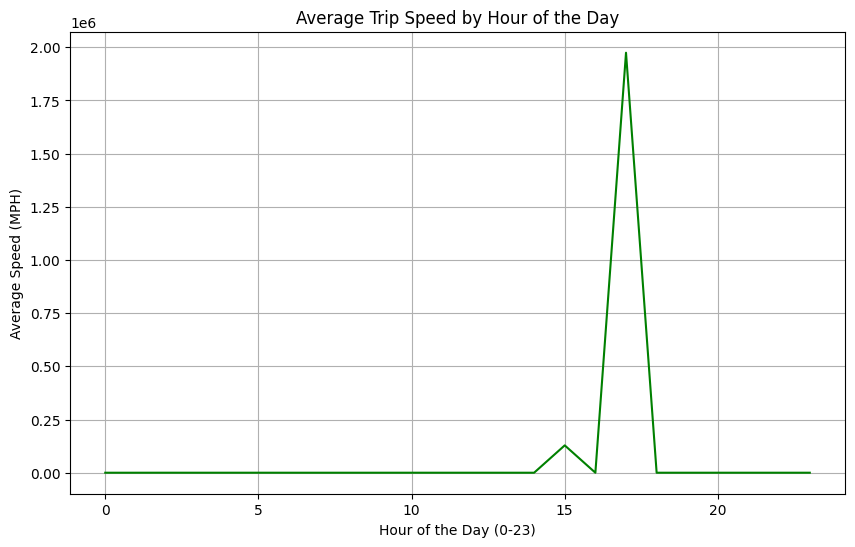

In [41]:
# Create a line plot showing average speed for each hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='HOUR', y='AVG_SPEED_MPH', errorbar=None, color='green')
plt.title('Average Trip Speed by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Average Speed (MPH)')
plt.grid(True)
plt.show()

### 7. Top 10 Most Frequent Routes
Key Insight: There is one overwhelmingly dominant travel corridor: Cary to Morrisville. This route is taken far more often than any other, suggesting it is a critical artery for commuters or business travelers in this dataset.

/tmp/ipython-input-4142962678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_routes.values, y=top_10_routes.index, palette='coolwarm')


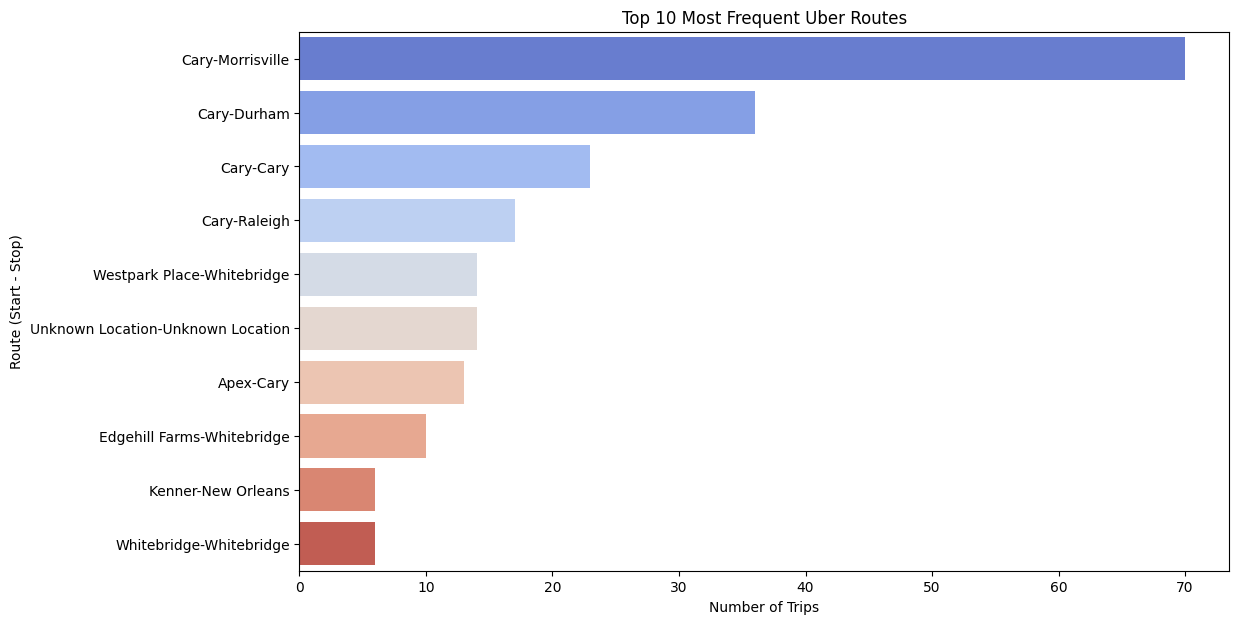

In [42]:
# Find the top 10 most frequent routes
top_10_routes = dataset['ROUTE'].value_counts().nlargest(10)

# Create a horizontal bar plot to display the top 10 routes
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_routes.values, y=top_10_routes.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Uber Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Route (Start - Stop)')
plt.show()

## Concluding Insights: Uber Trip Analysis
The analysis of this Uber dataset paints a clear picture of a service predominantly used by business professionals for short-distance travel within a specific work week schedule.

**Overwhelmingly Business-Focused:** The primary driver for trips is business, with "Meetings" and "Meal/Entertain" being the most cited purposes. This is strongly supported by the travel patterns, which show a steep drop-off in activity during the weekends.

**Clear Temporal Patterns:** Travel peaks in the afternoon and on Fridays, suggesting use for mid-day appointments and wrapping up the work week. The analysis of average speed confirms real-world conditions, showing a noticeable dip during afternoon hours, which corresponds to traffic congestion.

**Dominant Commuter Corridor:** The trips are typically short, solving "last-mile" travel needs rather than long-distance transport. The analysis uncovered one overwhelmingly popular route: Cary to Morrisville. This corridor is the central artery of travel in this dataset, indicating a strong commuter or business link between these two locations.

In summary, the data does not represent general public usage but rather a specific, business-oriented use case characterized by short, purposeful trips during the work week along a primary travel route.